Chinese Instrument (Mel)


In [1]:
import sys
from pathlib import Path
root = Path.cwd()
while root != root.parent and not (root / "src").exists():
    root = root.parent
if str(root) not in sys.path:
    sys.path.insert(0, str(root))
import torch
import yaml
import matplotlib.pyplot as plt
from src.train.utils import multi_label_train_loop
print("Repo root:", root)


Repo root: d:\qingchaolaopian\Instrument Sound\GitHub\ml-based-analysis-of-sound


In [2]:
TRAIN_RUN = "Chinese_mel_v1"
WEIGHTS_DIR = Path(f"../models/saved_weights/{TRAIN_RUN}")
USE_CKPT = False  # True to resume from last.pt

# MANIFEST_CSV = "../../data/processed/train_mels.csv",
    
MANIFEST_CSV = [
    "../../data/processed/train_mels.csv",
    "../../data/processed/train_mels_mixed.csv",
]
LABELS_YAML = "../configs/labels.yaml"
AUDIO_CONFIG_YAML = "../configs/audio_params.yaml" 

CONFIG = {
    "batch_size": 64,
    "lr": 1e-3,
    "epochs": 300,
    "patience": 30,
    "weight_decay": 1e-4,
    "dropout": 0.5,
    "val_frac": 0.2,
    "seed": 1337,
    "threshold": 0.5
}




In [3]:
with open(AUDIO_CONFIG_YAML, 'r', encoding='utf-8') as f:
    audio_params = yaml.safe_load(f)
with open(LABELS_YAML, 'r', encoding='utf-8') as f:
    label_config = yaml.safe_load(f)
    classes = [c.strip().lower() for c in label_config.get('train_labels', [])]
print(f"Loaded {len(classes)} classes: {', '.join(classes)}")


resume_ckpt = WEIGHTS_DIR / "last.pt" if USE_CKPT else None
if resume_ckpt is None:
    print("Starting fresh (resume disabled).")
elif not resume_ckpt.exists():
    resume_ckpt = None
    print("Starting fresh. No previous weights found.")
else:
    print(f"Existing weights detected. Resuming from {resume_ckpt}")

results = multi_label_train_loop(
    manifest_csv=MANIFEST_CSV,
    classes=classes,
    ckpt_dir=WEIGHTS_DIR,
    epochs=CONFIG["epochs"],
    batch_size=CONFIG["batch_size"],
    lr=CONFIG["lr"],
    weight_decay=CONFIG["weight_decay"],
    val_frac=CONFIG["val_frac"],
    dropout=CONFIG["dropout"],
    patience=CONFIG["patience"],
    num_workers=0,
    threshold=CONFIG["threshold"],
    seed=CONFIG["seed"],
    audio_cfg=audio_params['audio'],
    resume_from=resume_ckpt,
    save_best_stamped=False,
)
    
# Run the training
history = results["history"]


Loaded 15 classes: strings, brass, percussion, woodwind, sheng, dizi, timpani, erhu, pipa, suona, guzheng, piano, guqin, xiao, yangqin
Starting fresh (resume disabled).
[1/300] Loss: 0.1980/0.1099 | Val MicroF1: 0.8311 | Time: 23.7s
[2/300] Loss: 0.0987/0.0819 | Val MicroF1: 0.8823 | Time: 27.5s
[3/300] Loss: 0.0747/0.0651 | Val MicroF1: 0.9070 | Time: 26.6s
[4/300] Loss: 0.0615/0.0532 | Val MicroF1: 0.9229 | Time: 29.6s
[5/300] Loss: 0.0529/0.0498 | Val MicroF1: 0.9288 | Time: 28.3s
[6/300] Loss: 0.0476/0.0526 | Val MicroF1: 0.9263 | Time: 27.5s
[7/300] Loss: 0.0457/0.0432 | Val MicroF1: 0.9383 | Time: 28.0s
[8/300] Loss: 0.0320/0.0358 | Val MicroF1: 0.9475 | Time: 28.4s
[9/300] Loss: 0.0304/0.0423 | Val MicroF1: 0.9405 | Time: 28.4s
[10/300] Loss: 0.0290/0.0376 | Val MicroF1: 0.9479 | Time: 28.8s
[11/300] Loss: 0.0393/0.0477 | Val MicroF1: 0.9322 | Time: 27.8s
[12/300] Loss: 0.0373/0.0442 | Val MicroF1: 0.9399 | Time: 29.3s
[13/300] Loss: 0.0329/0.0407 | Val MicroF1: 0.9427 | Time: 2

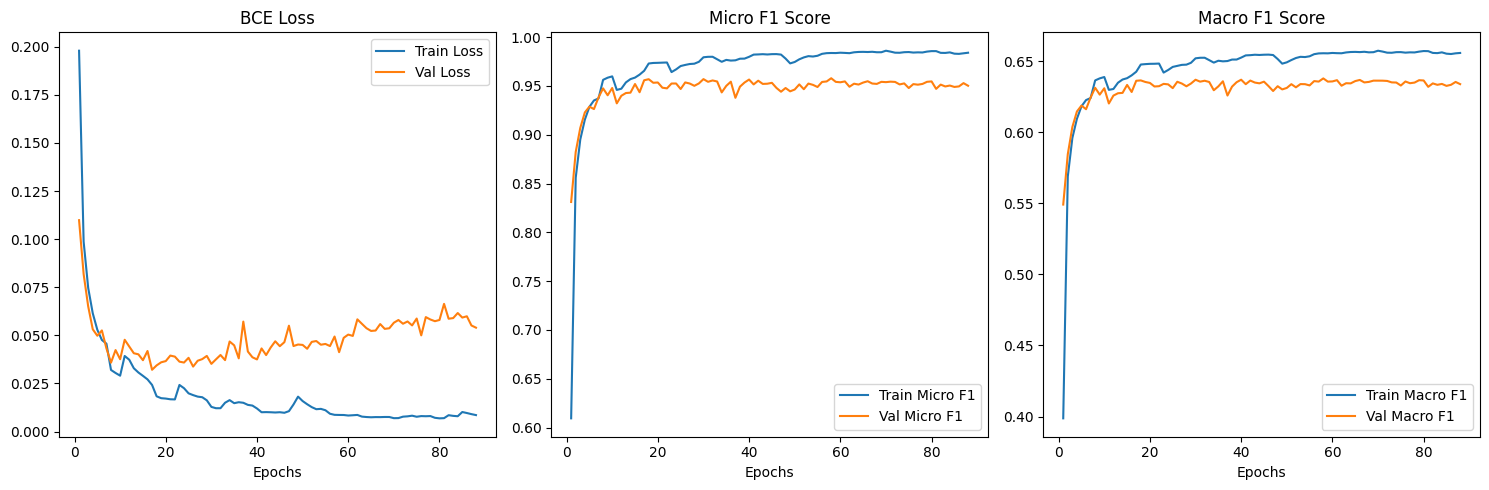

Audio Config used during training:
{'sr': 44100, 'duration': 3.0, 'n_mels': 128, 'win_ms': 30.0, 'hop_ms': 10.0, 'fmin': 20.0, 'fmax': 20000.0}


In [4]:
from src.train.utils import plot_metrics

WEIGHTS_DIR = Path(f"../models/saved_weights/{TRAIN_RUN}")
MODEL_WEIGHTS = Path(WEIGHTS_DIR / "last.pt")
ckpt_loaded = torch.load(MODEL_WEIGHTS, map_location="cpu")
audio_params = ckpt_loaded['audio_config']
history = ckpt_loaded["history"]
plot_metrics(history)

print("Audio Config used during training:")
print(audio_params)
